In [1]:
import numpy as np
from keras import models, layers, datasets, backend
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import keras

In [2]:
num_classes = 10
(X_train, y_train),(X_test, y_test) = datasets.mnist.load_data() 

In [3]:
'''
cnn을 다룰때는 1차원으로 값을 펼치지 않고, 이미지를 통으로 넣기 때문에
채널이 중요하다
흑백이미지라도 1이라는 값을 넣어줘야한다.
채널을 표현하는 방법
1) channel First 1,28,28
2) channel Last  28,28,1

여기서는 channel Last로 되어있다... ToTensor를 안 써주므로, 기존 값인 channel로 되어있고,
이것(채널)을 알아내는 방법은 backend로 알아 볼 수 있다.
'''
print(X_train.shape)
print(X_train.shape[1:])
img_rows, img_cols = X_train.shape[1:]

(60000, 28, 28)
(28, 28)


In [4]:
channel = backend.image_data_format()
channel # 이를 통해서 backend로 알아 볼 수 있다.

'channels_last'

# 전처리

CNN에서는 채널을 꼭 넣어줘야 한다. 그리고 채널을 

In [5]:
if backend.image_data_format == 'chennel_first':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

  input_shape = (1, img_rows, img_cols)

else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

  input_shape = (img_rows, img_cols, 1)

##### 스케일링

In [6]:
X_train = X_train/255
X_test = X_test/255
# 아래와 같은 코드인지 확인해보자.

In [7]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /=255
# X_test /=255

In [8]:
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

In [20]:
model = keras.Sequential()

model.add(layers.Conv2D(32,
                        kernel_size=(3,3),
                        activation = 'relu',
                        input_shape = input_shape))
model.add(layers.Conv2D(64,
                        kernel_size=(3,3),
                        activation = 'relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten()) # 1차원으로 나열해준다.
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary() # 표로 전체적인 결과값을 볼수 있다.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

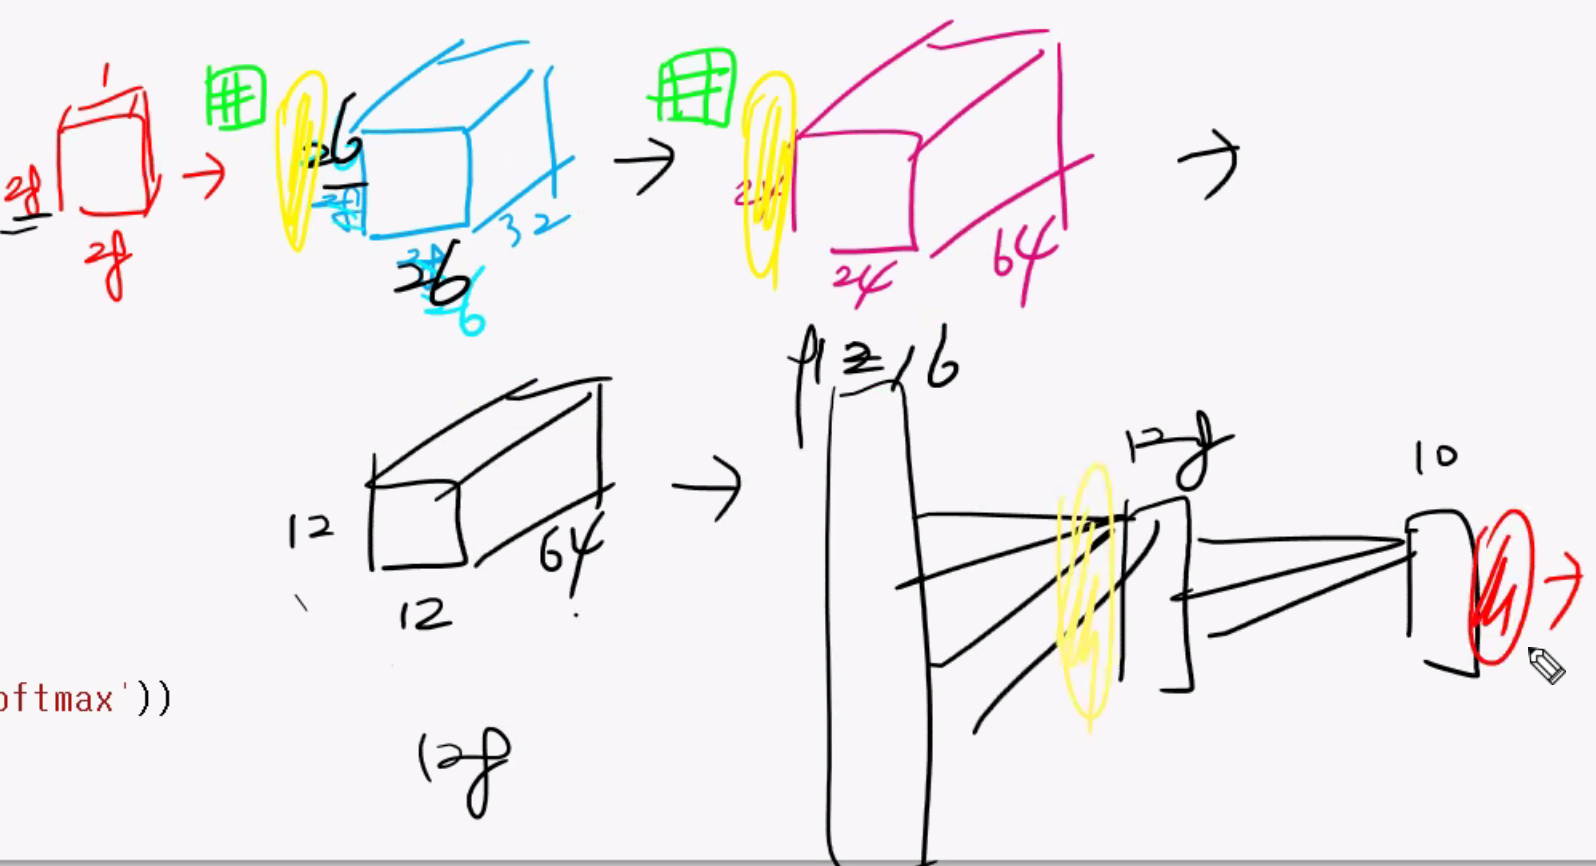

padding의 디폴트 값은 0 이다.
padding을 안 써줘서28에서 26으로 줄어든다.

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy']) #rmsprop으로 성능 평가를 해보자

In [11]:
num_batch_size = 100
num_epochs = 50
validation_split = 0.2

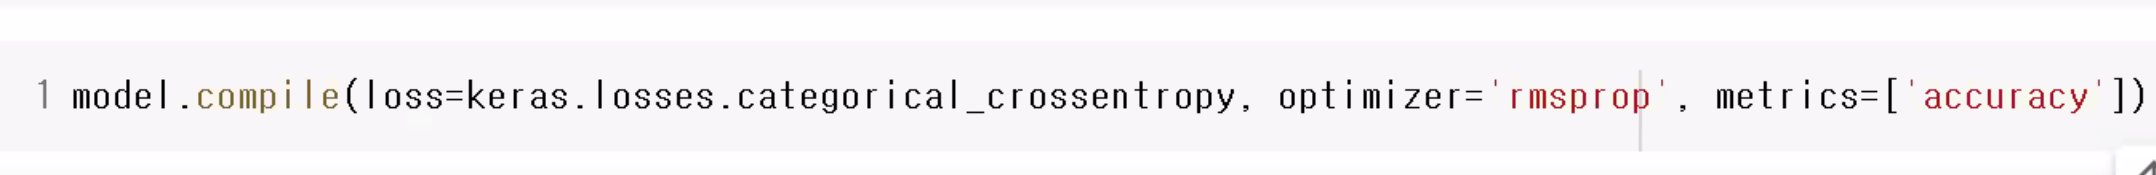

In [12]:
history = model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs,validation_split=validation_split)

Epoch 1/50
480/480 [==============================] - 6s 8ms/step - loss: 0.4061 - accuracy: 0.8710 - val_loss: 0.0723 - val_accuracy: 0.9787
Epoch 2/50
480/480 [==============================] - 3s 7ms/step - loss: 0.0656 - accuracy: 0.9802 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 3/50
480/480 [==============================] - 3s 7ms/step - loss: 0.0437 - accuracy: 0.9872 - val_loss: 0.0451 - val_accuracy: 0.9875
Epoch 4/50
480/480 [==============================] - 3s 7ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0419 - val_accuracy: 0.9883
Epoch 5/50
480/480 [==============================] - 3s 7ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0432 - val_accuracy: 0.9893
Epoch 6/50
480/480 [==============================] - 3s 7ms/step - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.0429 - val_accuracy: 0.9885
Epoch 7/50
480/480 [==============================] - 3s 7ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0393 - val_accuracy: 0.9892
Epoch 

In [25]:
# loss 관련된 plot 함수
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch') # X 측이 늘어남에 따라서 Y축이 얼마나 떨어지는가가 궁금한것이다.
    plt.legend(['Train','Validation'])
    plt.savefig('Loss_Plot.png', dpi=300) # dpi해상도를 조절 할 수 있다.
    plt.show()
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'])
    plt.savefig('Acc_Plot.png', dpi=300) # dpi해상도를 조절 할 수 있다.
    plt.show()

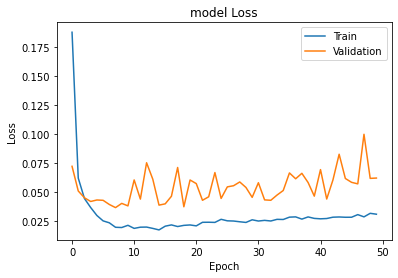

In [26]:
plot_loss(history)

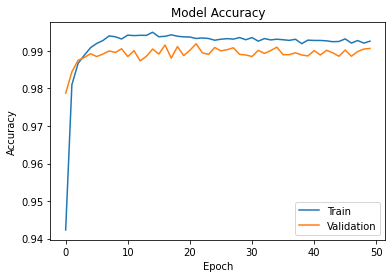

In [27]:
plot_acc(history)

#Model Evaluation

In [19]:
model_performance = model.evaluate(X_test,Y_test,batch_size=num_batch_size)
print(f'loss:{model_performance[0]}, accuracy:{model_performance[1]}')
print(*model_performance)

100/100 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9895
loss:0.05172428488731384, accuracy:0.9894999861717224
0.05172428488731384 0.9894999861717224
